# Neural Networks ACML Assignment 2 - Ahmad Soni - 668564

In [26]:
#Import Cell
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In this assignment we will look at a dataset for healthcare, in particular, Diabetes data to try and predict if a patient will have diabetes based on features of the dataset

In [27]:
#prepare dataset

stroke_df = pd.read_csv('diabetes-dataset.csv')
stroke_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


For the purposes of this assignment and neural networks, we want to look at numerical only features and binary features.

In [28]:


stroke_df_useful = stroke_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age','Outcome']]
stroke_df_useful.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [29]:
stroke_df_useful.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
print(stroke_df_useful.shape)
print(stroke_df_useful.dtypes)

(2000, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


This tells us we have a dataset of 5110 items, 4 categories and are all of numerical type data. There are also no Null values present

Next we will use SKlearn to split our data into testing and training sets as well as standardize it. This is the only use of the SKlearn library in this notebook.

In [31]:

X = stroke_df_useful.drop(columns=['Outcome'])
y_label = stroke_df_useful['Outcome'].values.reshape(X.shape[0],1)
#y_label

In [32]:
#Data Split
Xtrain,  Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [33]:
#Standardize Data
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

#np.set_printoptions(threshold=np.inf)
#print(ytrain)

Shape of train set is (1600, 8)
Shape of test set is (400, 8)
Shape of train label is (1600, 1)
Shape of test labels is (400, 1)


We will now begin to code the main method for out neural network. We will be designing a 2 layer neural network. We will initially start with 6 nodes in our hidden layer. Since we are using 2 layers, we need 2 activation functions. In this case we will use RELU for the 1st and Sigmoid for the 2nd 

In [34]:
class NeuralNet():

    def __init__(self, layers=[8,6,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):

        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
        
    #Activation Functions
        
    #Relu
    
    def relu(self,Z):

        return np.maximum(0,Z)
    
    #Sigmoid

    def sigmoid(self,Z):

        return 1/(1+np.exp(-Z))

    #Relu Derivative
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    #Sigmoid Derivative

    def dsigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))
    
    #Tanh
    def tanh(self, x):
        return np.tanh(x)
    
    #softmax
    
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis = 0)
    
    #linear
    def linear(self, x):
        return x
    
    
    #Error Function
    
    #ETA replaces 0 with a number close to 0 to make sure there isn't inconsistencies caused by 0's
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def error(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
        
        
    def forward_propagation(self):

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.error(self.y,yhat)
 
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
        
    def back_propagation(self,yhat):

        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2 
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)  
        
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
    
    
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
        
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("log Error")
        plt.title("Error curve for training")
        plt.show()    
        
        

We can now test if the code works

In [35]:
nn = NeuralNet()
nn.fit(Xtrain, ytrain)

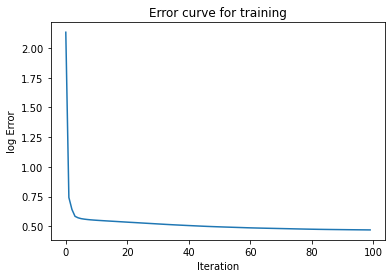

In [36]:
nn.plot_loss()

This shows us the Error curve as we train our data. We can see that as the iterations increase, our Error decreases, meaning the neural network is functioning correctly and improving with iterations

In [37]:
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))



Train accuracy is 76
Test accuracy is 81


In [38]:
#Prediction Array

print(train_pred)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


We can see the accuracy is quite good, but perhaps some changes can improve the results

## Testing The effect of iterations and learning rate

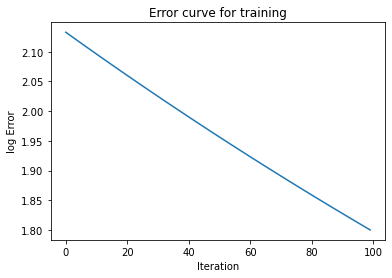

Train accuracy is 35
Test accuracy is 32


In [14]:
nn = NeuralNet(layers=[8,6,1], learning_rate=0.000001, iterations=100) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))




Decreasing the learning rate naturally causes the model to fit a lot slower over iterations and the accurace is incredibly bad as it's not fitting at at all

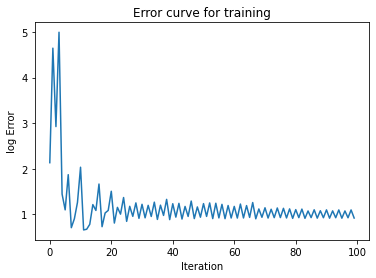

Train accuracy is 65
Test accuracy is 66


In [15]:
nn = NeuralNet(layers=[8,6,1], learning_rate=0.01, iterations=100) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

A higher learning rate leads to faster but more erratic fitting. The accuracy is also worse.

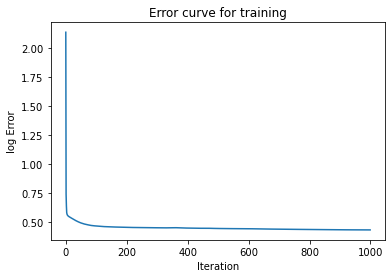

Train accuracy is 78
Test accuracy is 83


In [16]:
nn = NeuralNet(layers=[8,6,1], learning_rate=0.001, iterations=1000) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

More iterations means we still reach a fit. In this case, it is even more accurate, however our computation time and intensity will increase with more iterations.

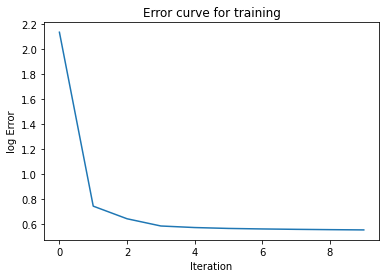

Train accuracy is 72
Test accuracy is 75


In [17]:
nn = NeuralNet(layers=[8,6,1], learning_rate=0.001, iterations=10) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

With less iterations we can see the curve not as a smooth line from the application of the gradient descent method. It is also further from reaching the fitting point as compared to the others it's still quite far from 0, this also leads to a decrease in accuracy.

## Testing adding additional nodes to the hidden layer

We will take the result above with the best accuracy and add/remove nodes to test results

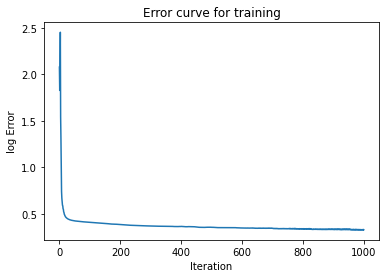

Train accuracy is 83
Test accuracy is 83


In [18]:
nn = NeuralNet(layers=[8,16,1], learning_rate=0.001, iterations=1000) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

If we add nodes to have 16 our accuracy goes up, but so too does our compuatation time. We also need to be careful as we can overfit our data if we add too many nodes. We are probably overfitting here as our accuracies match.

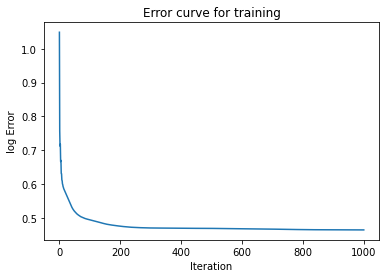

Train accuracy is 76
Test accuracy is 81


In [19]:
nn = NeuralNet(layers=[8,2,1], learning_rate=0.001, iterations=1000) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

Lowering the amount of nodes in this case has increased the accuracy, but it could possible cause underfitting if we don't have enough.

## Testing the effect of using different activation functions

## Tanh

In [20]:
class NeuralNetTanh():

    def __init__(self, layers=[8,6,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):

        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
        
    #Activation Functions
        
    #Relu
    
    def relu(self,Z):

        return np.maximum(0,Z)
    
    #Sigmoid

    def sigmoid(self,Z):

        return 1/(1+np.exp(-Z))

    #Relu Derivative
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    #Sigmoid Derivative

    def dsigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))
    
    #Tanh
    def tanh(self, x):
        return np.tanh(x)
    
    #softmax
    
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis = 0)
    
    #linear
    def linear(self, x):
        return x
    
    
    #Error Function
    
    #ETA replaces 0 with a number close to 0 to make sure there isn't inconsistencies caused by 0's
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def error(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
        
        
    def forward_propagation(self):

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.tanh(Z2)
        loss = self.error(self.y,yhat)
 
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
        
    def back_propagation(self,yhat):

        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2 
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)  
        
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.tanh(Z2)
        return np.round(pred)
    
    
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
        
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("log Error")
        plt.title("Error curve for training")
        plt.show()    

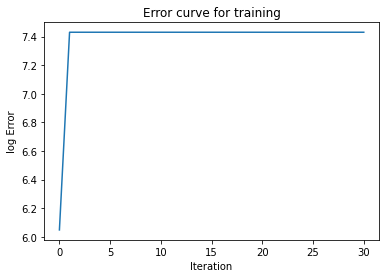

In [21]:
nnT = NeuralNetTanh(layers=[8,6,1], learning_rate=0.001, iterations=1000) # create the NN model
nnT.fit(Xtrain, ytrain) #train the model
nnT.plot_loss()

train_pred = nnT.predict(Xtrain)
test_pred = nnT.predict(Xtest)



## Softmax

In [22]:
class NeuralNetSoftmax():

    def __init__(self, layers=[8,6,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):

        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
        
    #Activation Functions
        
    #Relu
    
    def relu(self,Z):

        return np.maximum(0,Z)
    
    #Sigmoid

    def sigmoid(self,Z):

        return 1/(1+np.exp(-Z))

    #Relu Derivative
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    #Sigmoid Derivative

    def dsigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))
    
    #Tanh
    def tanh(self, x):
        return np.tanh(x)
    
    #softmax
    
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis = 0)
    
    #linear
    def linear(self, x):
        return x
    
    
    #Error Function
    
    #ETA replaces 0 with a number close to 0 to make sure there isn't inconsistencies caused by 0's
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def error(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
        
        
    def forward_propagation(self):

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.softmax(Z2)
        loss = self.error(self.y,yhat)
 
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
        
    def back_propagation(self,yhat):

        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2 
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)  
        
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.softmax(Z2)
        return np.round(pred)
    
    
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
        
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("log Error")
        plt.title("Error curve for training")
        plt.show() 

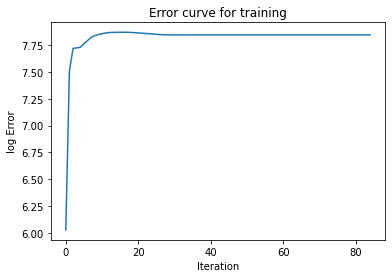

In [23]:
nnS = NeuralNetSoftmax(layers=[8,6,1], learning_rate=0.001, iterations=1000) # create the NN model
nnS.fit(Xtrain, ytrain) #train the model
nnS.plot_loss()

train_pred = nnS.predict(Xtrain)
test_pred = nnS.predict(Xtest)


## Linear

In [24]:
class NeuralNetLinear():

    def __init__(self, layers=[8,6,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):

        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
        
    #Activation Functions
        
    #Relu
    
    def relu(self,Z):

        return np.maximum(0,Z)
    
    #Sigmoid

    def sigmoid(self,Z):

        return 1/(1+np.exp(-Z))

    #Relu Derivative
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    #Sigmoid Derivative

    def dsigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))
    
    #Tanh
    def tanh(self, x):
        return np.tanh(x)
    
    #softmax
    
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis = 0)
    
    #linear
    def linear(self, x):
        return x
    
    
    #Error Function
    
    #ETA replaces 0 with a number close to 0 to make sure there isn't inconsistencies caused by 0's
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def error(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
        
        
    def forward_propagation(self):

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.linear(Z2)
        loss = self.error(self.y,yhat)
 
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
        
    def back_propagation(self,yhat):

        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2 
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)  
        
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.linear(Z2)
        return np.round(pred)
    
    
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
        
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("log Error")
        plt.title("Error curve for training")
        plt.show() 

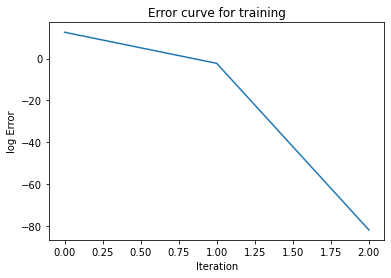

In [25]:
nnL = NeuralNetLinear(layers=[8,6,1], learning_rate=0.001, iterations=1000) # create the NN model
nnL.fit(Xtrain, ytrain) #train the model
nnL.plot_loss()

train_pred = nnL.predict(Xtrain)
test_pred = nnL.predict(Xtest)

